In [1]:
import numpy as np
from pathlib import Path

# Setup direcrtories
root = Path("/storage/vbutoi/scratch/ESE")
scratch_root = Path("/storage/vbutoi/scratch/ESE")
code_root = Path("/storage/vbutoi/projects/ESE")

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
from ese.experiment.datasets.utils.build_shapes import perlin_generation
import yaml 

# Load the inference cfg from local.
##################################################
cal_cfg_root = code_root / "ese" / "experiment" / "configs" / "processing"
##################################################
with open(cal_cfg_root / "synthetic.yaml", 'r') as file:
    gen_cfg = yaml.safe_load(file)

images, label_maps = perlin_generation(
    num_to_gen=6, 
    seed=42, 
    gen_opts_cfg=gen_cfg["gen_opts"], aug_cfg=gen_cfg["aug_opts"],
    rot_k=1
)

Set seed: 42


In [3]:
img_tensor = np.stack(images)
lab_tensor = np.stack(label_maps).argmax(axis=-1)

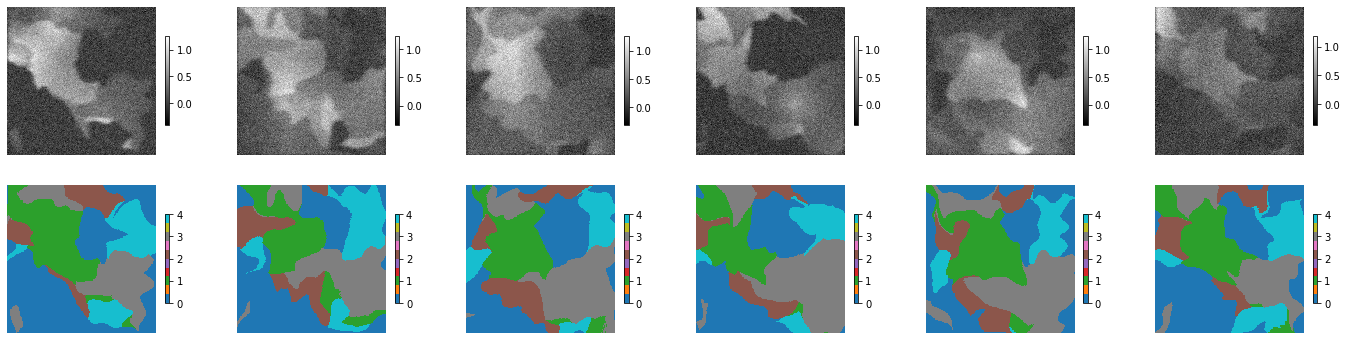

In [5]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 6, figsize=(24, 6))
for idx in range(6):
    im = axarr[0, idx].imshow(img_tensor[idx], cmap='gray', interpolation='none')
    lab = axarr[1, idx].imshow(lab_tensor[idx], cmap='tab10', interpolation='none')
    f.colorbar(im, ax=axarr[0, idx], shrink=0.6)
    f.colorbar(lab, ax=axarr[1, idx], shrink=0.6)
    # Turn off axis lines and labels.
    axarr[0, idx].axis('off')
    axarr[1, idx].axis('off')
plt.show()